# **Income Classification Model**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [2]:
income_df = pd.read_csv("adult.csv")
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
income_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Cleaning

 ### Dealing with Missing Value

In [4]:
income_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Attributes workclass, occupation, and native-country most NAs. Let's drop these NA. 

In [6]:
income_df.age = income_df.age.astype(float)
income_df['hours-per-week'] = income_df['hours-per-week'].astype(float)

In [7]:
my_df = income_df.dropna()

In [8]:
my_df['predclass'] = my_df['income']
del my_df['income']
my_df['education-num'] = my_df['educational-num']
del my_df['educational-num']


In [9]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null float64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
gender            48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null float64
native-country    48842 non-null object
predclass         48842 non-null object
education-num     48842 non-null int64
dtypes: float64(2), int64(4), object(9)
memory usage: 6.0+ MB


In [10]:
my_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
predclass         0
education-num     0
dtype: int64

In [11]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null float64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
gender            48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null float64
native-country    48842 non-null object
predclass         48842 non-null object
education-num     48842 non-null int64
dtypes: float64(2), int64(4), object(9)
memory usage: 6.0+ MB


## Feature Engineering

In [12]:
print('workclass',my_df.workclass.unique())
print('education',my_df.education.unique())
print('marital-status',my_df['marital-status'].unique())
print('occupation',my_df.occupation.unique())
print('relationship',my_df.relationship.unique())
print('race',my_df.race.unique())
print('gender',my_df.gender.unique())
print('native-country',my_df['native-country'].unique())
print('predclass',my_df.predclass.unique())

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 

In [13]:
my_df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [14]:
my_df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [15]:
my_df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [16]:
my_df.replace('?', np.nan, inplace=True)
my_df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
predclass            0
education-num        0
dtype: int64

In [17]:
my_df.dropna(inplace=True)
my_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
predclass         0
education-num     0
dtype: int64

### Predclass

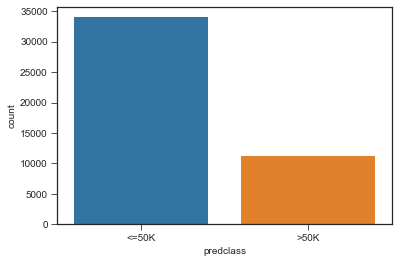

In [18]:
plt.style.use('seaborn-ticks')
sns.countplot(x="predclass", data=my_df)

Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed. However, since there is no data on the upper limit of adult's income above 50K

### Education

In [19]:
my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [20]:
my_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
2,Doctorate,16.000000
4,Masters,14.237951
0,Bachelors,13.000000
1,CommunityCollege,10.372091
3,HighGrad,9.000000
5,dropout,5.621268


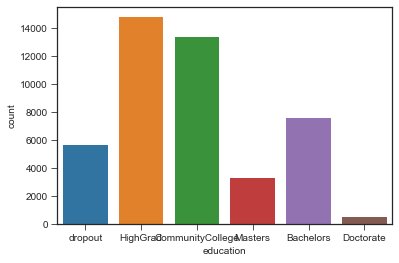

In [21]:
plt.style.use('seaborn-ticks')
sns.countplot(x="education", data=my_df)
plt.savefig('2.png')

### Marital-status

In [22]:
my_df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

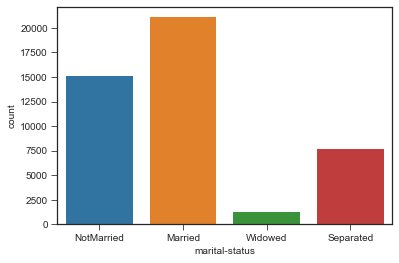

In [23]:
plt.style.use('seaborn-ticks')
sns.countplot(x="marital-status", data=my_df)
plt.savefig('3.png')

### Occupation

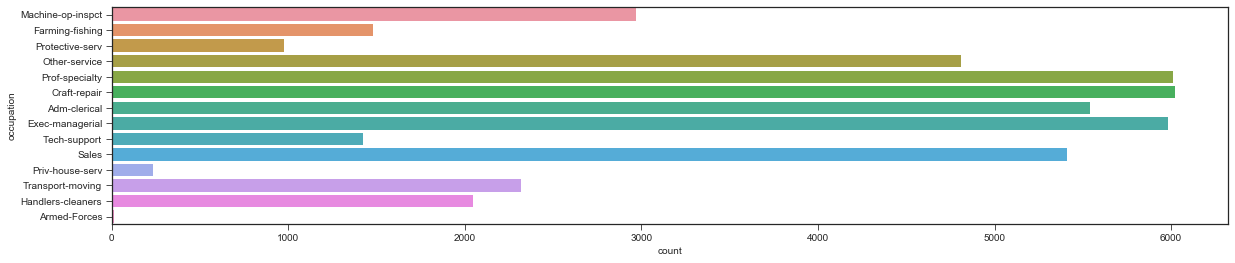

In [24]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=my_df)

In [25]:
my_df['occupation'].value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64

### Workclass

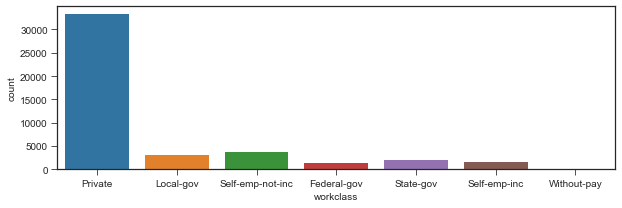

In [26]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,3)) 
sns.countplot(x="workclass", data=my_df)

In [27]:
my_df['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [28]:
my_df['workclass'].shape

(45222,)

### age

In [29]:
my_df['age_bin'] = pd.cut(my_df['age'], 20)

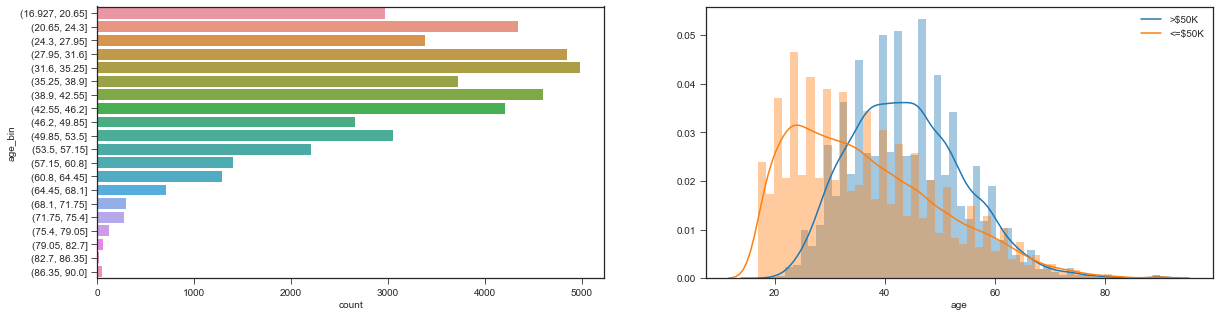

In [30]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=my_df)
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['predclass'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})
plt.savefig('6.png')

In [31]:
my_df['age_bin'].value_counts()

(31.6, 35.25]      4981
(27.95, 31.6]      4844
(38.9, 42.55]      4600
(20.65, 24.3]      4340
(42.55, 46.2]      4211
(35.25, 38.9]      3723
(24.3, 27.95]      3382
(49.85, 53.5]      3053
(16.927, 20.65]    2968
(46.2, 49.85]      2663
(53.5, 57.15]      2206
(57.15, 60.8]      1403
(60.8, 64.45]      1287
(64.45, 68.1]       713
(68.1, 71.75]       302
(71.75, 75.4]       277
(75.4, 79.05]       126
(79.05, 82.7]        66
(86.35, 90.0]        53
(82.7, 86.35]        24
Name: age_bin, dtype: int64

In [32]:
my_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,44.006067
0,<=50K,36.749427


### Race

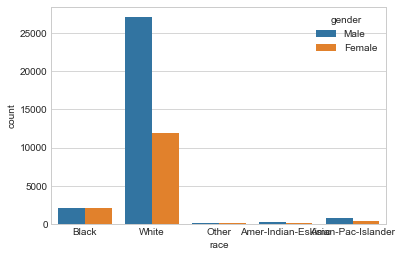

In [34]:
x, y, hue = "race", "prop", "gender" 
sns.countplot(x=x, hue=hue, data=my_df)

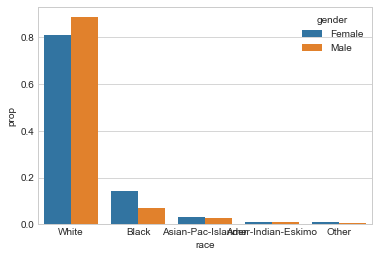

In [35]:
prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)#

### Hours of Work 

In [36]:
my_df['hours-per-week_bin'] = pd.cut(my_df['hours-per-week'], 10)
my_df['hours-per-week'] = my_df['hours-per-week']

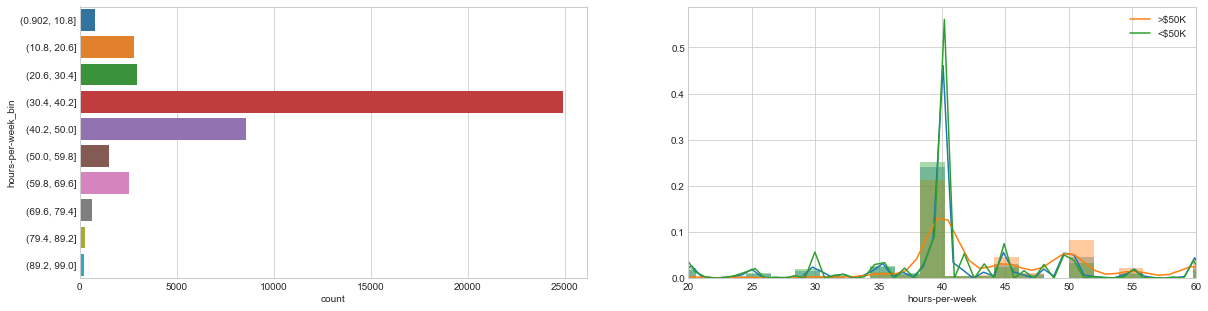

In [37]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hours-per-week']);
sns.distplot(my_df[my_df['predclass'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)
plt.savefig('9.png')

In [38]:
my_df['hours-per-week_bin'].value_counts()

(30.4, 40.2]     24910
(40.2, 50.0]      8576
(20.6, 30.4]      2933
(10.8, 20.6]      2825
(59.8, 69.6]      2541
(50.0, 59.8]      1527
(0.902, 10.8]      777
(69.6, 79.4]       648
(79.4, 89.2]       287
(89.2, 99.0]       198
Name: hours-per-week_bin, dtype: int64

### Create a crossing feature: Age + hour of work

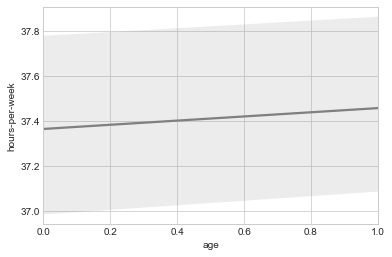

In [39]:
sns.regplot(my_df.age, my_df['hours-per-week'],scatter=False,color='grey')

In [40]:
my_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,education-num,age_bin,hours-per-week_bin
0,25.0,Private,226802,dropout,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K,7,"(24.3, 27.95]","(30.4, 40.2]"
1,38.0,Private,89814,HighGrad,Married,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K,9,"(35.25, 38.9]","(40.2, 50.0]"
2,28.0,Local-gov,336951,CommunityCollege,Married,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K,12,"(27.95, 31.6]","(30.4, 40.2]"
3,44.0,Private,160323,CommunityCollege,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K,10,"(42.55, 46.2]","(30.4, 40.2]"
5,34.0,Private,198693,dropout,NotMarried,Other-service,Not-in-family,White,Male,0,0,30.0,United-States,<=50K,6,"(31.6, 35.25]","(20.6, 30.4]"


In [41]:
# Crossing Numerical Features
my_df['age-hours'] = my_df['age']*my_df['hours-per-week']
my_df['age-hours_bin'] = pd.cut(my_df['age-hours'], 10)

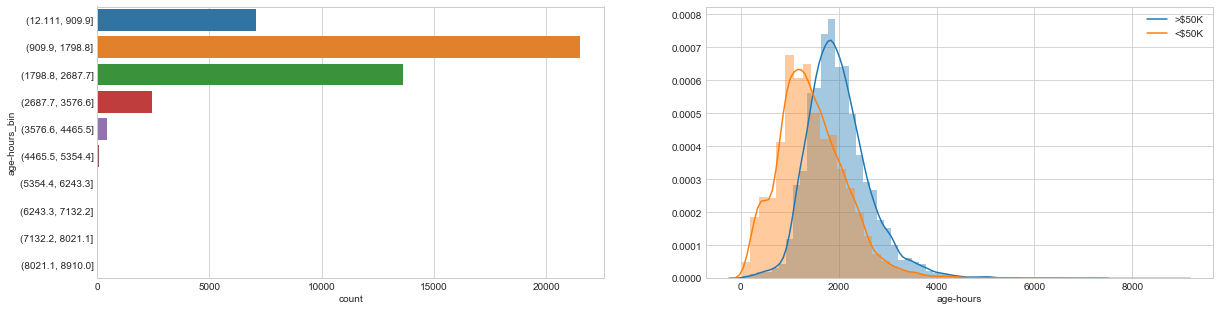

In [42]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['predclass'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})
plt.savefig('11.png')

## EDA

### Pair Plot

C:\Users\Saibaba\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


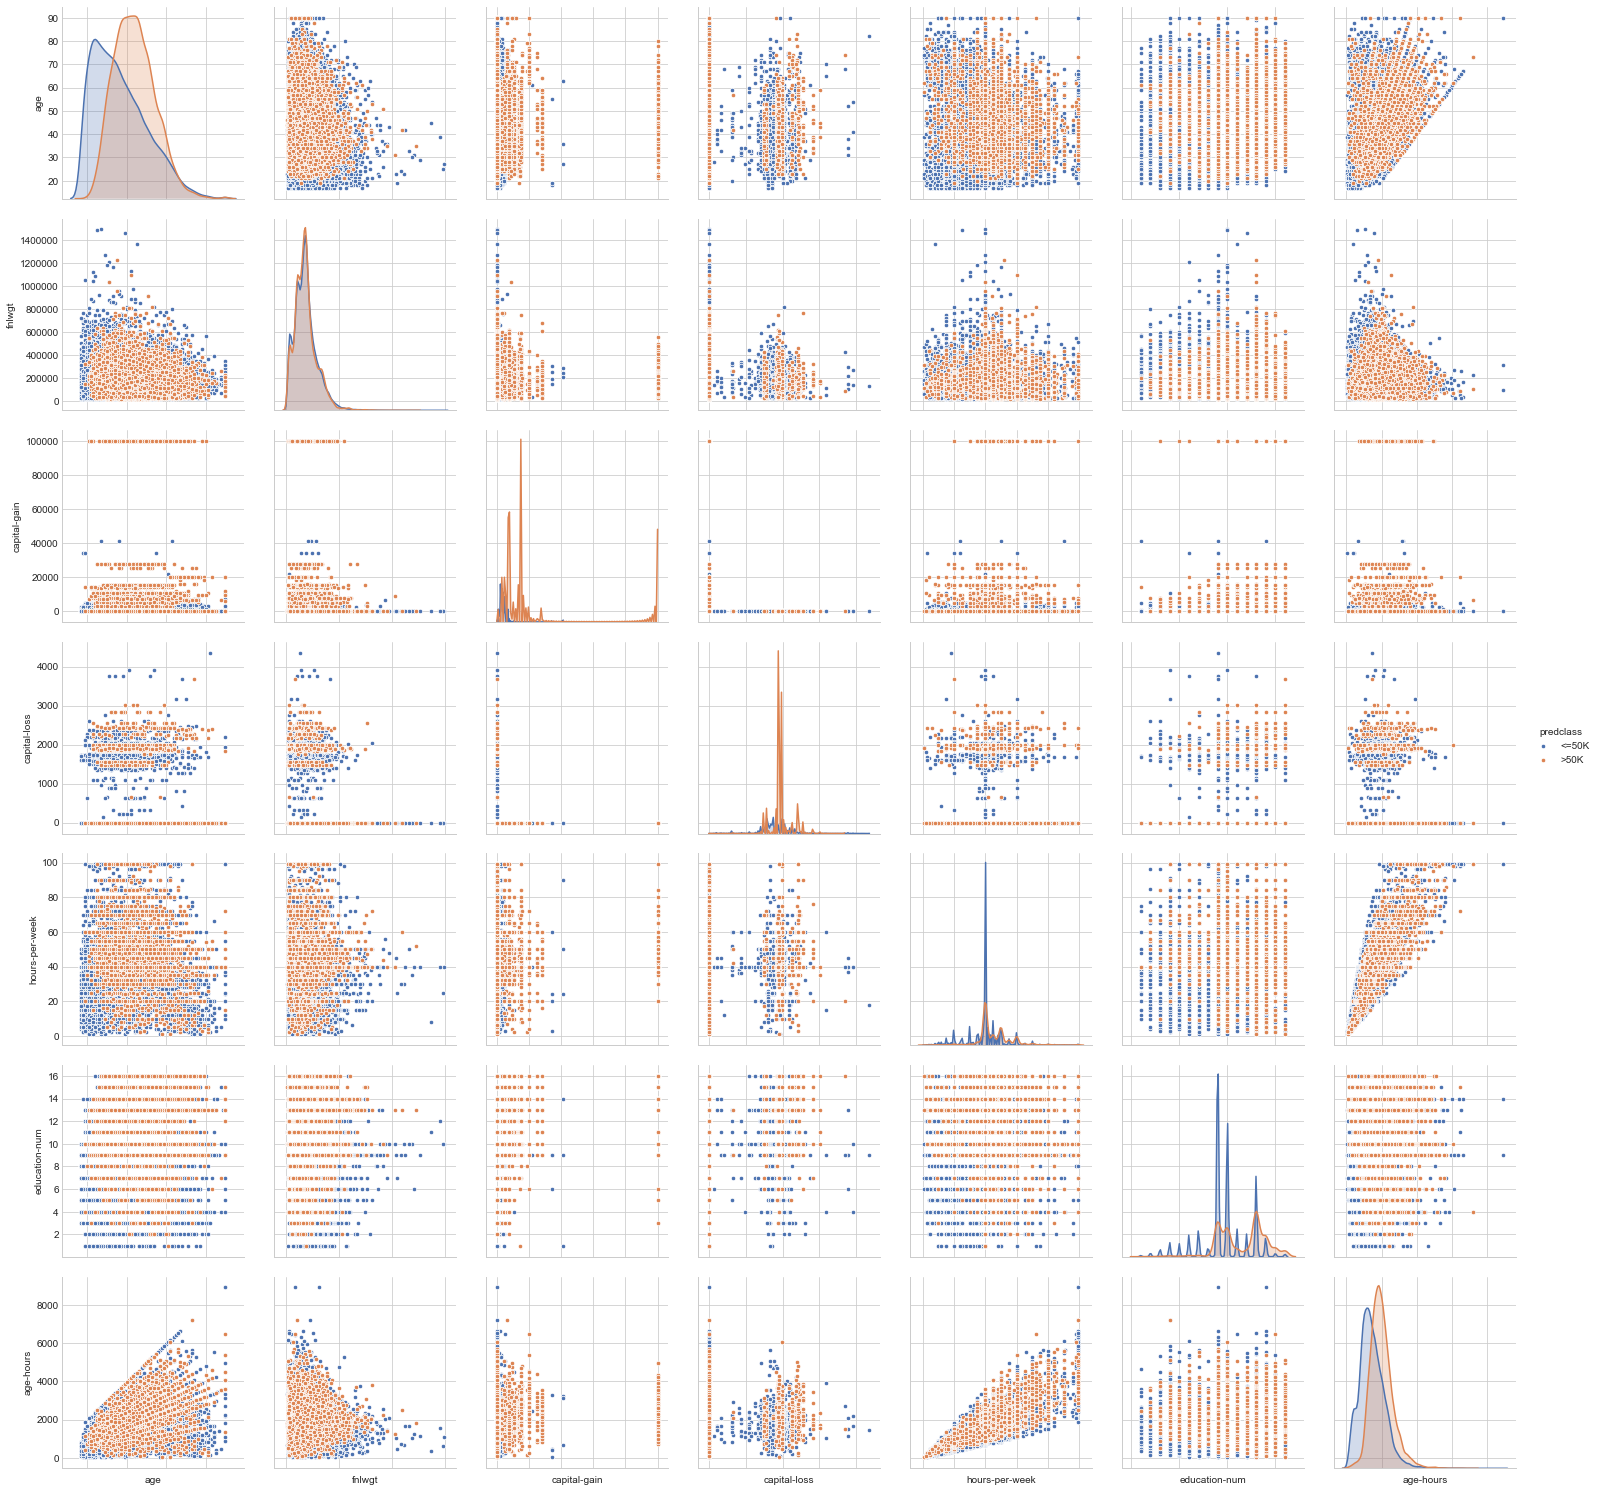

In [43]:
#pair plots of entire dataset
pp = sns.pairplot(my_df, hue = 'predclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])
plt.savefig('12.png')

### Correlation Heatmap

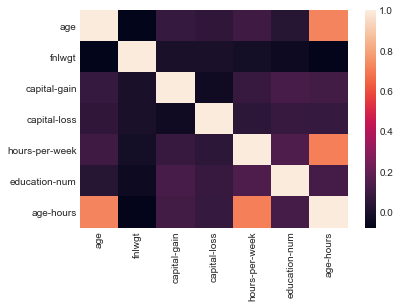

In [44]:
sns.heatmap(my_df.corr())

### Bivariate Analysis

In [45]:
my_df.tail()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,education-num,age_bin,hours-per-week_bin,age-hours,age-hours_bin
48837,27.0,Private,257302,CommunityCollege,Married,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K,12,"(24.3, 27.95]","(30.4, 40.2]",1026.0,"(909.9, 1798.8]"
48838,40.0,Private,154374,HighGrad,Married,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K,9,"(38.9, 42.55]","(30.4, 40.2]",1600.0,"(909.9, 1798.8]"
48839,58.0,Private,151910,HighGrad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K,9,"(57.15, 60.8]","(30.4, 40.2]",2320.0,"(1798.8, 2687.7]"
48840,22.0,Private,201490,HighGrad,NotMarried,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K,9,"(20.65, 24.3]","(10.8, 20.6]",440.0,"(12.111, 909.9]"
48841,52.0,Self-emp-inc,287927,HighGrad,Married,Exec-managerial,Wife,White,Female,15024,0,40.0,United-States,>50K,9,"(49.85, 53.5]","(30.4, 40.2]",2080.0,"(1798.8, 2687.7]"


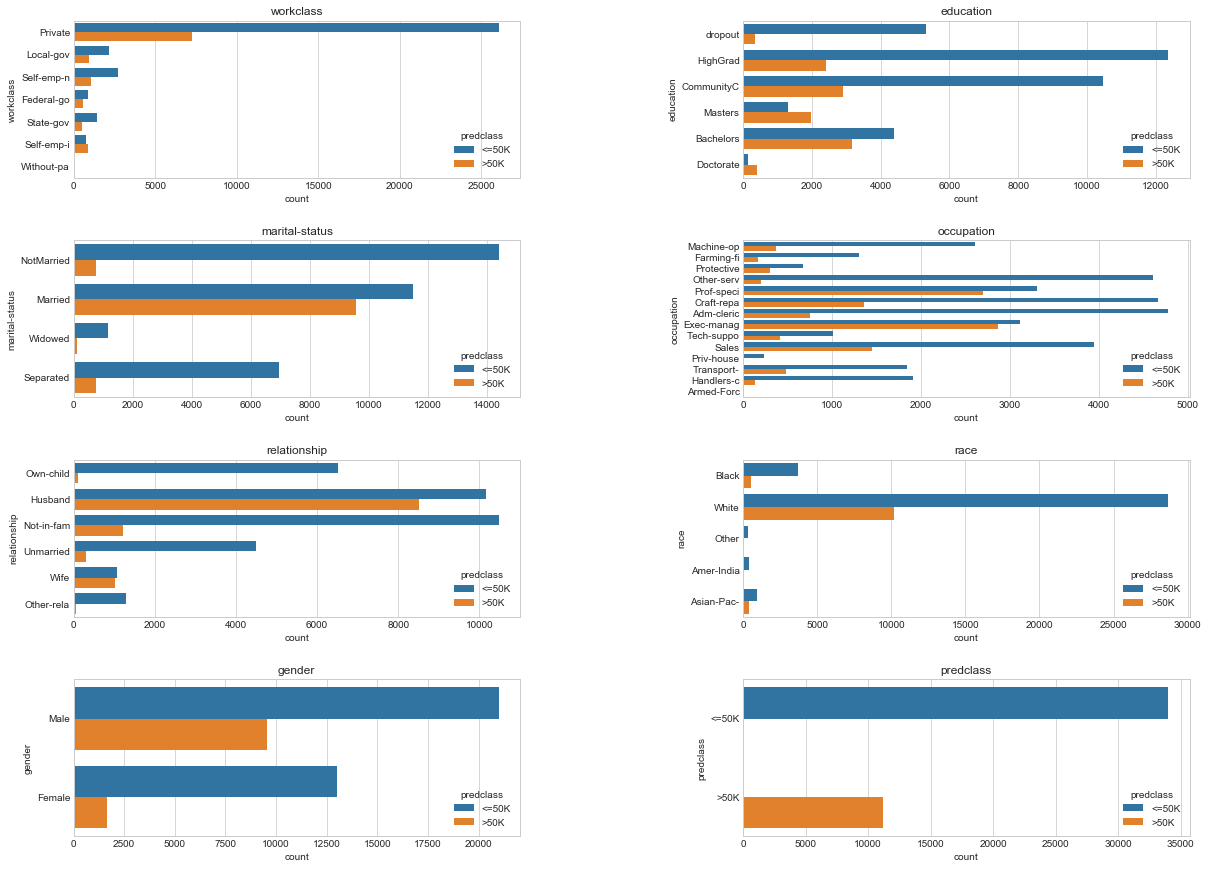

In [46]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = my_df.loc[:, ['workclass', 'education', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'gender','predclass']]  

plot_bivariate_bar(bivariate_df, hue='predclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

plt.savefig('14.png')

The dataset was created in 1996, a large number of jobs fall into the category of mannual labor, e.g., Handlers cleaners, craft repairers, etc. Executive managerial role and some one with a professional speciality has a high level payment.

### Occupation vs. Income Level

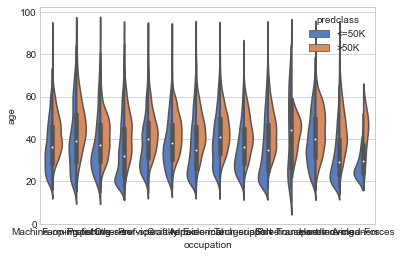

In [47]:
ax = sns.violinplot(x="occupation", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)

The general trend is in sync with common sense: more senior workers have higher salaries. Armed-forces don't have a high job salaries.

Interestingly, private house sevice has the widest range of age variation, however, the payment is no higher than 50K, indicating that senority doesn't give rise to a higher payment comparing to other jobs. 

### Race vs. Income Level

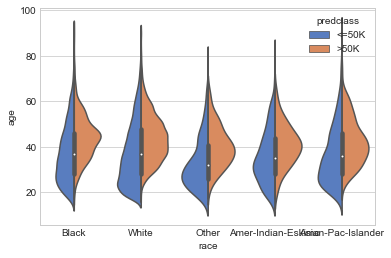

In [48]:
from matplotlib import pyplot
sns.violinplot(x="race", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)


## Building Machine Learning Models

In [49]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix


### Feature Encoding 

In [50]:
# Feature Selection and Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split


In [51]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,education-num,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,8,2,18119,5,1,6,3,2,1,0,0,39,38,0,6,2,3,442,1
1,21,2,3913,3,0,4,0,4,1,0,0,49,38,0,8,5,4,775,2
2,11,1,23770,1,0,10,0,4,1,0,0,39,38,1,11,3,3,494,1
3,27,2,10474,1,0,6,0,2,1,96,0,39,38,1,9,7,3,725,1
5,17,2,15397,5,1,7,1,4,1,0,0,29,38,0,5,4,2,449,1


### Train-test split

In [52]:
drop_elements = ['education', 'native-country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X.head()

,age,workclass,fnlwgt,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,education-num,age-hours
0,8,2,18119,1,6,3,2,1,0,0,39,6,442
1,21,2,3913,0,4,0,4,1,0,0,49,8,775
2,11,1,23770,0,10,0,4,1,0,0,39,11,494
3,27,2,10474,0,6,0,2,1,96,0,39,9,725
5,17,2,15397,1,7,1,4,1,0,0,29,5,449


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Without PCA

### Classification Models

#### Logistic Regression

In [54]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred_logreg = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The train accuracy of the Logistic Regression is', logreg.score(X_train,y_train))
print('The test accuracy of the Logistic Regression is', score_logreg)

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The train accuracy of the Logistic Regression is 0.8316886419548332
The test accuracy of the Logistic Regression is 0.829297954671089


#### K-Nearest Neighbors

In [55]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The train accuracy of the KNN Model is',knn.score(X_train,y_train))
print('The test accuracy of the KNN Model is',score_knn)

The train accuracy of the KNN Model is 0.8260773419575974
The test accuracy of the KNN Model is 0.748922056384743


#### Gaussian Naive Bayes

In [56]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The train accuracy of Gaussian Naive Bayes is', gaussian.score(X_train,y_train))
print('The test accuracy of Gaussian Naive Bayes is', score_gaussian)

The train accuracy of Gaussian Naive Bayes is 0.8132791552643945
The test accuracy of Gaussian Naive Bayes is 0.8087341072415699


#### Decision Tree

In [57]:
# Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_decisiontree = decisiontree.score(X_test,y_test)
print('The train accuracy of Decision Tree is', decisiontree.score(X_train,y_train))
print('The test accuracy of Decision Tree is', score_decisiontree)

The train accuracy of Decision Tree is 0.9999170743842773
The test accuracy of Decision Tree is 0.8029850746268656


#### Random Forest

In [58]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The train accuracy of the Random Forest Model is', randomforest.score(X_train,y_train))
print('The test accuracy of the Random Forest Model is', score_randomforest)

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The train accuracy of the Random Forest Model is 0.9872570970506123
The test accuracy of the Random Forest Model is 0.8402432283029297


#### Bagging

In [59]:
# Bagged Decision Trees for Classification - necessary dependencies

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)
print('The train accuracy of the Bagging classifier model is', bag.score(X_train,y_train))
print('The test accuracy of the Bagging classifier Model is', bag.score(X_test,y_test))

The train accuracy of the Bagging classifier model is 0.9866766177405534
The test accuracy of the Bagging classifier Model is 0.84212271973466


#### Boosting

In [61]:
#import the libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [62]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=150
)
ada.fit(X_train, y_train)
print('The train accuracy of the Boosting classifier model is', ada.score(X_train,y_train))
print('The test accuracy of the Boosting classifier Model is', ada.score(X_test,y_test))

The train accuracy of the Boosting classifier model is 0.8652735163225254
The test accuracy of the Boosting classifier Model is 0.858595909342178


In [63]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)

print('The train accuracy of the Gradient Boosting classifier model is', gb_clf2.score(X_train,y_train))
print('The test accuracy of the Gradient Boosting classifier Model is', gb_clf2.score(X_test,y_test))

The train accuracy of the Gradient Boosting classifier model is 0.8538021394808857
The test accuracy of the Gradient Boosting classifier Model is 0.8487562189054726


In [64]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print('The train accuracy of the XG Boosting classifier model is', xgb.score(X_train,y_train))
print('The test accuracy of the XG Boosting classifier Model is', xgb.score(X_test,y_test))

The train accuracy of the XG Boosting classifier model is 0.8656052187854162
The test accuracy of the XG Boosting classifier Model is 0.8572692095080154


### Cross Validation- w/o PCA

In [65]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Logistic Regression','Decision Tree','KNN','Random Forest','Bagging','AdaBoost','Gradient Boost','XGBoost']
models=[GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100),BaggingClassifier(),AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=150),GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0),XGBClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

,CV Mean,Std
Naive Bayes,0.812193,0.002365
Logistic Regression,0.829176,0.004384
Decision Tree,0.807173,0.001453
KNN,0.760979,0.002284
Random Forest,0.850228,0.002270
Bagging,0.842134,0.002208
AdaBoost,0.861284,0.003308
Gradient Boost,0.851621,0.002704
XGBoost,0.863009,0.002242


Random Forest is the most accurate model.

### Principal Component Analysis (PCA)- w/o scaling

In [66]:
drop_elements = ['education', 'native-country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [67]:
pca = PCA(n_components=7)
pca.fit_transform(X)

array([[ 5.26670204e+03, -1.95335356e+02, -3.58534399e+00, ...,
        -1.60094179e+00, -2.31446575e-01,  1.07093565e+00],
       [-8.93998603e+03,  1.07294897e+02, -8.60072952e+00, ...,
        -2.99479979e+00, -2.05836758e+00, -2.60874507e-01],
       [ 1.09175760e+04, -1.31055887e+02, -4.33009965e+00, ...,
        -1.72346155e+00,  4.25636720e+00,  1.07193269e-01],
       ...,
       [-3.20329566e+03,  2.55936737e+02, -1.05940982e+01, ...,
        -4.01027146e+00, -6.02737360e+00, -1.18073072e+00],
       [ 2.90020748e+03, -4.31912810e+02,  1.86359112e-01, ...,
        -7.35789139e-01, -5.98034679e+00, -3.50550914e+00],
       [ 9.02283804e+03,  2.07993463e+02,  1.00322374e+02, ...,
         1.03200056e+00, -3.56855004e+00, -1.12130768e+00]])

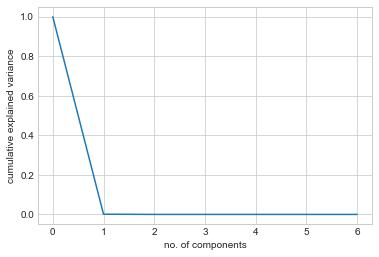

In [68]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('no. of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [69]:
pca = PCA(n_components= 1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Classification Models

#### Logistic Regression

In [70]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The train accuracy of the Logistic Regression is', logreg.score(X_train,y_train))
print('The test accuracy of the Logistic Regression is', score_logreg)

The train accuracy of the Logistic Regression is 0.7527158139149183
The test accuracy of the Logistic Regression is 0.7499170812603648


C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### K-Nearest Neighbors

In [71]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The train accuracy of the KNN Model is',knn.score(X_train,y_train))
print('The test accuracy of the KNN Model is',score_knn)

The train accuracy of the KNN Model is 0.7937363518257456
The test accuracy of the KNN Model is 0.7122166943062466


#### Gaussian Naive Bayes

In [72]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The train accuracy of Gaussian Naive Bayes is', gaussian.score(X_train,y_train))
print('The test accuracy of Gaussian Naive Bayes is', score_gaussian)

The train accuracy of Gaussian Naive Bayes is 0.7527158139149183
The test accuracy of Gaussian Naive Bayes is 0.7499170812603648


#### Decision Tree

In [73]:
# Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_decisiontree = decisiontree.score(X_test,y_test)
print('The train accuracy of Decision Tree is', decisiontree.score(X_train,y_train))
print('The test accuracy of Decision Tree is', score_decisiontree)

The train accuracy of Decision Tree is 0.9933106669983691
The test accuracy of Decision Tree is 0.6613598673300166


#### Random Forest

In [74]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The train accuracy of the Random Forest Model is', randomforest.score(X_train,y_train))
print('The test accuracy of the Random Forest Model is', score_randomforest)

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The train accuracy of the Random Forest Model is 0.9535063714514747
The test accuracy of the Random Forest Model is 0.6715312327252626


#### Bagging

In [75]:
# Bagged Decision Trees for Classification - necessary dependencies

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [76]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)
print('The train accuracy of the Bagging classifier model is', bag.score(X_train,y_train))
print('The test accuracy of the Bagging classifier Model is', bag.score(X_test,y_test))

The train accuracy of the Bagging classifier model is 0.9528153246537856
The test accuracy of the Bagging classifier Model is 0.6706467661691542


#### Boosting

In [77]:
#import the libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [78]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=150
)
ada.fit(X_train, y_train)
print('The train accuracy of the Boosting classifier model is', ada.score(X_train,y_train))
print('The test accuracy of the Boosting classifier Model is', ada.score(X_test,y_test))

The train accuracy of the Boosting classifier model is 0.7530475163778091
The test accuracy of the Boosting classifier Model is 0.7494748479823107


In [79]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)

print('The train accuracy of the Gradient Boosting classifier model is', gb_clf2.score(X_train,y_train))
print('The test accuracy of the Gradient Boosting classifier Model is', gb_clf2.score(X_test,y_test))

The train accuracy of the Gradient Boosting classifier model is 0.7536832794316831
The test accuracy of the Gradient Boosting classifier Model is 0.7493642896627971


In [80]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print('The train accuracy of the XG Boosting classifier model is', xgb.score(X_train,y_train))
print('The test accuracy of the XG Boosting classifier Model is', xgb.score(X_test,y_test))

The train accuracy of the XG Boosting classifier model is 0.7527158139149183
The test accuracy of the XG Boosting classifier Model is 0.7499170812603648


### Cross Validation-PCA w/o scaling

In [81]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Logistic Regression','Decision Tree','KNN','Random Forest','Bagging','AdaBoost','Gradient Boost','XGBoost']
models=[GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100),BaggingClassifier(),AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=150),GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0),XGBClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

,CV Mean,Std
Naive Bayes,0.812193,0.002365
Logistic Regression,0.829176,0.004384
Decision Tree,0.807859,0.001313
KNN,0.760979,0.002284
Random Forest,0.851621,0.003063
Bagging,0.842709,0.001826
AdaBoost,0.861284,0.003308
Gradient Boost,0.851621,0.002704
XGBoost,0.863009,0.002242


Random Forest is the most accurate model.

### Principal Component Analysis (PCA)

In [82]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [83]:
drop_elements = ['education', 'native-country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [84]:
data_scaled = pd.DataFrame(preprocessing.scale(X),columns=X.columns)

In [85]:
pca = PCA(n_components=7)
pca.fit_transform(data_scaled)

array([[-1.5261922 , -0.6603141 ,  0.9025444 , ...,  1.14901818,
         1.21501594, -0.11859483],
       [ 1.37860295, -0.55133489,  0.72812631, ..., -0.57840493,
         0.07071534,  1.12585709],
       [ 0.2549081 , -1.99429023, -0.64447644, ...,  1.42159089,
        -0.29044199, -0.46441883],
       ...,
       [-1.25282098,  3.61171254,  1.18356229, ..., -0.59345648,
        -0.9573694 ,  0.05523744],
       [-2.43005433, -1.56158119,  0.72930596, ..., -0.55814909,
        -1.04638128,  0.38023979],
       [ 0.12356721,  1.84294083, -1.21148424, ..., -1.12861428,
        -1.65795734, -0.94717356]])

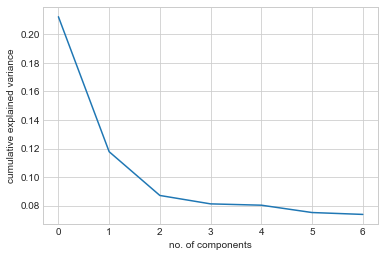

In [86]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('no. of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [87]:
pca = PCA(n_components= 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Classification Models

#### Logistic Regression

In [88]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The train accuracy of the Logistic Regression is', logreg.score(X_train,y_train))
print('The test accuracy of the Logistic Regression is', score_logreg)

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The train accuracy of the Logistic Regression is 0.7833153661165935
The test accuracy of the Logistic Regression is 0.7751243781094528


#### K-Nearest Neighbors

In [89]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The train accuracy of the KNN Model is',knn.score(X_train,y_train))
print('The test accuracy of the KNN Model is',score_knn)

The train accuracy of the KNN Model is 0.8228708848163198
The test accuracy of the KNN Model is 0.7417357656163627


#### Gaussian Naive Bayes

In [90]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The train accuracy of Gaussian Naive Bayes is', gaussian.score(X_train,y_train))
print('The test accuracy of Gaussian Naive Bayes is', score_gaussian)

The train accuracy of Gaussian Naive Bayes is 0.7821820493683832
The test accuracy of Gaussian Naive Bayes is 0.775787728026534


#### Decision Tree

In [91]:
# Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_decisiontree = decisiontree.score(X_test,y_test)
print('The train accuracy of Decision Tree is', decisiontree.score(X_train,y_train))
print('The test accuracy of Decision Tree is', score_decisiontree)

The train accuracy of Decision Tree is 0.9999170743842773
The test accuracy of Decision Tree is 0.7349917081260365


#### Random Forest

In [92]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The train accuracy of the Random Forest Model is', randomforest.score(X_train,y_train))
print('The test accuracy of the Random Forest Model is', score_randomforest)

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The train accuracy of the Random Forest Model is 0.9781629211930232
The test accuracy of the Random Forest Model is 0.7782200110558319


#### Bagging

In [93]:
# Bagged Decision Trees for Classification - necessary dependencies

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [94]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)
print('The train accuracy of the Bagging classifier model is', bag.score(X_train,y_train))
print('The test accuracy of the Bagging classifier Model is', bag.score(X_test,y_test))

The train accuracy of the Bagging classifier model is 0.9774442325234265
The test accuracy of the Bagging classifier Model is 0.7893864013266998


#### Boosting

In [95]:
#import the libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [96]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=150
)
ada.fit(X_train, y_train)
print('The train accuracy of the Boosting classifier model is', ada.score(X_train,y_train))
print('The test accuracy of the Boosting classifier Model is', ada.score(X_test,y_test))

The train accuracy of the Boosting classifier model is 0.7984078281781242
The test accuracy of the Boosting classifier Model is 0.7923714759535655


In [97]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)

print('The train accuracy of the Gradient Boosting classifier model is', gb_clf2.score(X_train,y_train))
print('The test accuracy of the Gradient Boosting classifier Model is', gb_clf2.score(X_test,y_test))

The train accuracy of the Gradient Boosting classifier model is 0.8013931503441413
The test accuracy of the Gradient Boosting classifier Model is 0.7940298507462686


In [98]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print('The train accuracy of the XG Boosting classifier model is', xgb.score(X_train,y_train))
print('The test accuracy of the XG Boosting classifier Model is', xgb.score(X_test,y_test))

The train accuracy of the XG Boosting classifier model is 0.8043231887663432
The test accuracy of the XG Boosting classifier Model is 0.7969043670536208


### Cross Validation- PCA w/ scaling

In [99]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Logistic Regression','Decision Tree','KNN','Random Forest','Bagging','AdaBoost','Gradient Boost','XGBoost']
models=[GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100),BaggingClassifier(),AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=150),GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0),XGBClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

,CV Mean,Std
Naive Bayes,0.812193,0.002365
Logistic Regression,0.829176,0.004384
Decision Tree,0.807947,0.001311
KNN,0.760979,0.002284
Random Forest,0.851422,0.002754
Bagging,0.842400,0.002099
AdaBoost,0.861284,0.003308
Gradient Boost,0.851621,0.002704
XGBoost,0.863009,0.002242


Random Forest is the most accurate model.

#### Best Model

### Cross Validation

In [100]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Logistic Regression','Decision Tree','KNN','Random Forest']
models=[GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

,CV Mean,Std
Naive Bayes,0.812193,0.002365
Logistic Regression,0.829176,0.004384
Decision Tree,0.808301,0.001257
KNN,0.760979,0.002284
Random Forest,0.851886,0.002306


Random Forest is the most accurate model.

#### GridSearch

In [ ]:
model = RandomForestClassifier()
parameters = {'n_estimators': [500], 
              'max_features': ['log2', 'sqrt','auto'], 
              #The number of features to consider when looking for the best split
              'max_depth': [50,80,100], 
              'min_samples_split': [5,7,9],
             }
grid_obj = GridSearchCV(model, parameters,n_jobs=4,cv = 5)
grid_obj = grid_obj.fit(X_train,y_train)
model_params = grid_obj.best_params_
model_params

# Unsupervised Learning

## K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scale = sc.fit_transform(X)

In [ ]:
df_scaled=pd.DataFrame(df_scale,columns=['age', 'workclass', 'fnlwgt', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education-num', 'age-hours'])

In [ ]:
cluster_range = range(1,15)
cluster_errors=[]
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
for num_clusters in cluster_range:
    clusterrs = KMeans(num_clusters)
    clusterrs.fit(df_scaled)
    cluster_errors.append(clusterrs.inertia_)

In [ ]:
culters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
culters_df[0:10]

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(culters_df.num_clusters,culters_df.cluster_errors,marker = 'o')

In [ ]:
kmeans = KMeans(n_clusters=2, n_init = 10, random_state=251)

In [ ]:
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')
snail_df_labeled = df_scaled.join(df_labels)
df_analysis = (snail_df_labeled.groupby(['labels'] , axis=0))
df_analysis.head(3)

In [ ]:
y_test = y
y_pred= snail_df_labeled['labels']
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
print("accuracy: ",accuracy_score(y_test,y_pred))
print("precision: ",metrics.precision_score(y_test,y_pred,average='macro'))
print("recall: ",metrics.recall_score(y_test,y_pred,average='macro'))

In [ ]:
X=snail_df_labeled.drop('labels',axis=1)
y=snail_df_labeled['labels']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
names = X.columns
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

seed = 7
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)